In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv('~/Desktop/machine learning/Kaggle Competition/tcd ml 2019-20 income prediction training (with labels).csv'
                     ,header=None, names=['ins','yor','gd','age','cou','soc'
                                         ,'pro','ud','wg','hc','bh','inc'])

/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,5,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df['inc'].unique()

array(['Income in EUR', '61031.94416', '91001.32764', ..., 289951.3294,
       100046.5278, 145886.2885], dtype=object)

In [4]:
df.shape

(111994, 12)

Columns explains:
    - ins:Instance
    - yor:Year of Record
    - gd:Gender
    - age:Age
    - cou:Country
    - soc:Size of City
    - pro:Profession
    - ud:University Degree
    - wg:Wears Glasses
    - hc:Hair Color
    - bh:Boday Height[cm]
    - inc:Income in EUR


In [5]:
df.isnull().any()

ins    False
yor     True
gd      True
age     True
cou    False
soc    False
pro     True
ud      True
wg     False
hc      True
bh     False
inc    False
dtype: bool

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111994 entries, 0 to 111993
Data columns (total 12 columns):
ins    111994 non-null object
yor    111553 non-null object
gd     104562 non-null object
age    111500 non-null object
cou    111994 non-null object
soc    111994 non-null object
pro    111672 non-null object
ud     104624 non-null object
wg     111994 non-null object
hc     104752 non-null object
bh     111994 non-null object
inc    111994 non-null object
dtypes: object(12)
memory usage: 10.3+ MB


In [7]:
df.describe()

,ins,yor,gd,age,cou,soc,pro,ud,wg,hc,bh,inc
count,111994,111553,104562,111500,111994,111994,111672,104624,111994,104752,111994,111994
unique,111994,81,6,196,161,107885,1341,6,5,7,295,111992
top,1817,1981,male,15,Switzerland,95554,pipefitter,Bachelor,1,Black,162,162571
freq,1,1772,42758,1625,2327,4,261,43172,32829,42778,1258,2


In [8]:
df=df.drop(['ins'], axis=1)


In [9]:
df=df.drop([0])
df=df.drop([78093])

In [10]:

df.replace('No', np.nan, inplace=True)
df.replace('Unknown', np.nan, inplace=True)
df.replace('unknown', np.nan, inplace=True)
df.replace('unknow', np.nan, inplace=True)
df.replace('#N/A', np.nan, inplace=True)
cleanup_nums = {"gd":     {"0": np.nan},
                "cou": {"0": np.nan},
                "pro": {"0": np.nan},
                "ud": {"0": np.nan},
                "hc": {"0": np.nan}
               }
df.replace(cleanup_nums, inplace=True)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111992 entries, 1 to 111993
Data columns (total 11 columns):
yor    111551 non-null object
gd     96987 non-null object
age    111498 non-null object
cou    111992 non-null object
soc    111992 non-null object
pro    111670 non-null object
ud     76933 non-null object
wg     111992 non-null object
hc     104066 non-null object
bh     111992 non-null object
inc    111992 non-null object
dtypes: object(11)
memory usage: 10.3+ MB


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111992 entries, 1 to 111993
Data columns (total 11 columns):
yor    111551 non-null object
gd     96987 non-null object
age    111498 non-null object
cou    111992 non-null object
soc    111992 non-null object
pro    111670 non-null object
ud     76933 non-null object
wg     111992 non-null object
hc     104066 non-null object
bh     111992 non-null object
inc    111992 non-null object
dtypes: object(11)
memory usage: 10.3+ MB


In [12]:
df.iloc[78093,:]

yor                       2007
gd                        male
age                         84
cou                El Salvador
soc                    1776339
pro    mining machine operator
ud                      Master
wg                           0
hc                       Black
bh                         178
inc                    67543.3
Name: 78095, dtype: object

Text(0, 0.5, 'inc')

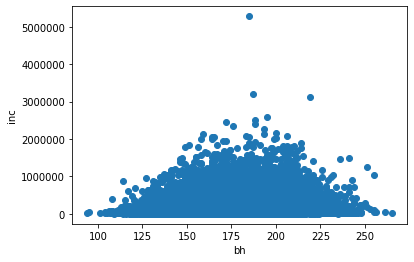

In [13]:
#df.to_csv('temp1.csv',mode = 'w', index=False)
df['inc'] = df['inc'].apply(pd.to_numeric, errors='coerce')
df['inc'].unique()

# convert numerical data 
df['bh'] = df['bh'].apply(pd.to_numeric, errors='coerce')

plt.scatter(df['bh'], df['inc'])
plt.xlabel('bh')
plt.ylabel('inc')

In [14]:
df['inc'].describe()

count    1.119920e+05
mean     1.092073e+05
std      1.497874e+05
min     -5.696906e+03
25%      3.077165e+04
50%      5.733909e+04
75%      1.260931e+05
max      5.285252e+06
Name: inc, dtype: float64

Text(0, 0.5, 'inc')

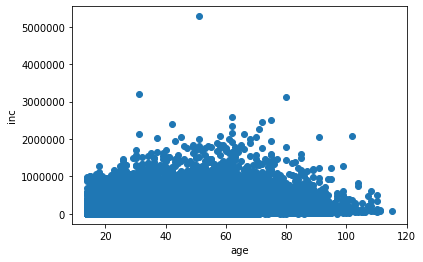

In [15]:
# convert numerical data 
df['age'] = df['age'].apply(pd.to_numeric, errors='coerce')

plt.scatter(df['age'], df['inc'])
plt.xlabel('age')
plt.ylabel('inc')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111992 entries, 1 to 111993
Data columns (total 11 columns):
yor    111551 non-null object
gd     96987 non-null object
age    111498 non-null float64
cou    111992 non-null object
soc    111992 non-null object
pro    111670 non-null object
ud     76933 non-null object
wg     111992 non-null object
hc     104066 non-null object
bh     111992 non-null int64
inc    111992 non-null float64
dtypes: float64(2), int64(1), object(8)
memory usage: 15.3+ MB


In [17]:


# DataframeMapper, CategoricalImputer
from sklearn_pandas import DataFrameMapper, CategoricalImputer

# Imputer
from sklearn.preprocessing import Imputer

# Function Transformer
from sklearn.preprocessing import FunctionTransformer

# check missing value percentage *(Self Defined Package)
from missing_values.missing_values_table import missing_values_table

# fill categoriacal missing values *(Self Defined Package)
from missing_values.fill_missing_values import Categorical_Imputer

In [18]:
# missing value table
missing_values_table(df)

Your slelected dataframe has 11 columns.
There are 6 columns that have missing values.


,Missing Values,% of Total Values
ud,35059,31.30
gd,15005,13.40
hc,7926,7.08
age,494,0.44
yor,441,0.39
pro,322,0.29


Convert to Numberic

In [19]:
# numerical columns
num_cols = ['yor','age','bh','soc','wg']

In [20]:
# categorical columns
cate_cols = df.columns.drop('inc').drop(num_cols)
cate_cols_noud=df.columns.drop('inc').drop(num_cols).drop('ud')

# display categorical columns
cate_cols

Index(['gd', 'cou', 'pro', 'ud', 'hc'], dtype='object')

In [21]:
# delete the space and convert to string
df['ud'] = df['ud'].str.strip()
df['pro'] = df['pro'].str.strip()
df['cou'] = df['cou'].str.strip()
# df['wg'] = df['wg'].str.strip()
df['hc'] = df['hc'].str.strip()
df['gd'] = df['gd'].str.strip()

In [22]:
# convert numerical data 
df[num_cols] = df[num_cols].apply(pd.to_numeric, errors='coerce')

In [23]:
df['inc']=df['inc'].apply(pd.to_numeric, errors='coerce')

In [24]:
df=df[(df[['inc']] > 0).all(1)]
# df['inc']
# convert ins to zero if it is negative 
# df['inc'] = df['inc'].apply(lambda x: 0 if x<0  else x)


In [25]:
df=df.sort_values(by=['inc'])

df.head()

,yor,gd,age,cou,soc,pro,ud,wg,hc,bh,inc
32055,1997.0,female,20.0,Serbia,1961,parking enforcement officer,NaN,1,Blond,172,6.113263
104951,1989.0,female,20.0,Israel,76251,parking lot attendant,Bachelor,0,Blond,165,29.730641
39989,1983.0,female,18.0,Lebanon,43885,grant manager,NaN,1,Blond,143,35.926513
48910,2019.0,female,19.0,Switzerland,31525,order filler,NaN,0,Black,160,65.548061
14526,1999.0,male,17.0,Laos,66151,interagency exercise coordinator,Bachelor,1,Brown,179,67.667744


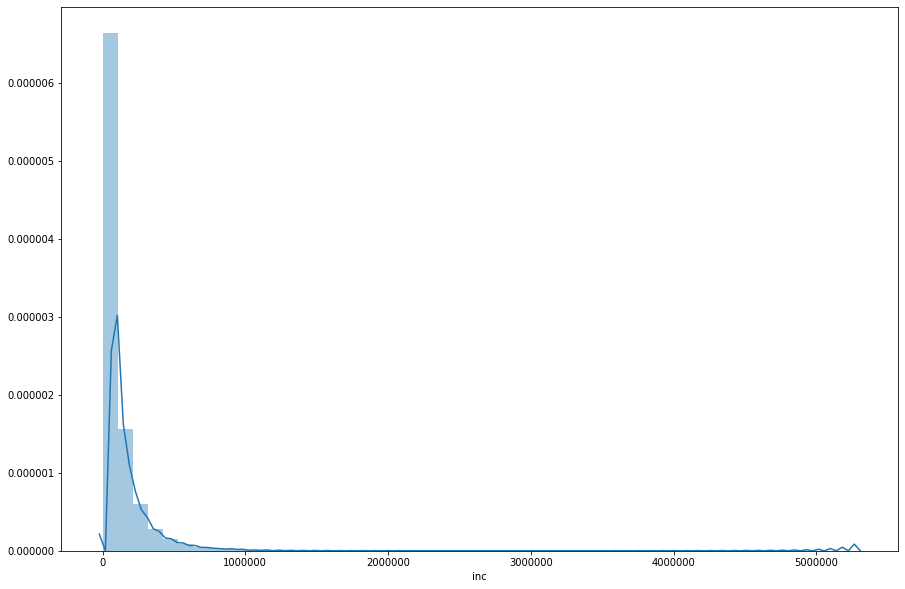

In [26]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['inc'])

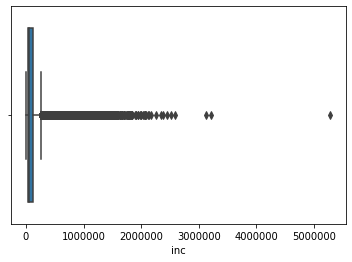

In [27]:
import seaborn as sns
sns.boxplot(x=df['inc'])

In [28]:
# Q1 = df['inc'].quantile(0.25)
# Q3 = df['inc'].quantile(0.75)
# # # # Q1 = df.quantile(0.25)
# # # # Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

In [29]:
# df_out = df[~((df['inc'] < (Q1 - 1.5 * IQR)) |(df['inc'] > (Q3 + 1.5 * IQR)))]
# # # df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))]
# df_out.shape

In [30]:
# df=df_out

In [31]:
# df=df[(df[['inc']] > 0).all(1)]
df['inc']

32055     6.113263e+00
104951    2.973064e+01
39989     3.592651e+01
48910     6.554806e+01
14526     6.766774e+01
              ...     
77646     2.515871e+06
93022     2.580243e+06
60080     3.126312e+06
108763    3.213682e+06
78094     5.285252e+06
Name: inc, Length: 111826, dtype: float64

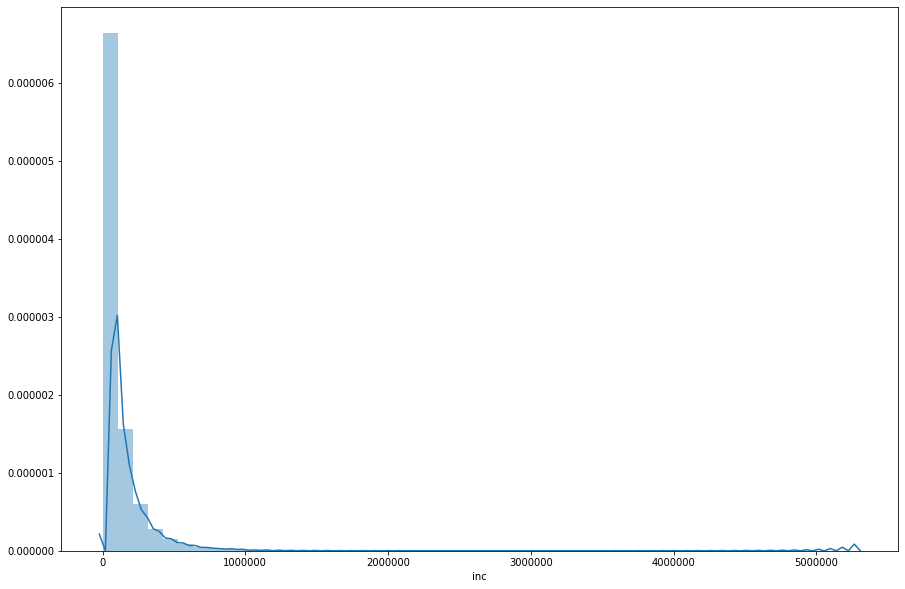

In [32]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['inc'])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111826 entries, 32055 to 78094
Data columns (total 11 columns):
yor    111386 non-null float64
gd     96868 non-null object
age    111333 non-null float64
cou    111826 non-null object
soc    111826 non-null int64
pro    111505 non-null object
ud     76844 non-null object
wg     111826 non-null int64
hc     103913 non-null object
bh     111826 non-null int64
inc    111826 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 10.2+ MB


In [34]:
# check the number of unique values
df[cate_cols].apply(lambda x: x.nunique(), axis=0)

gd        3
cou     160
pro    1338
ud        3
hc        4
dtype: int64

In [35]:
# Problem found on df['wg'], [nan, '1', 0, 1]
#df['wg'].unique()

In [36]:
# delete the space and convert to string
df['ud'] = df['ud'].str.strip()
df['pro'] = df['pro'].str.strip()
df['cou'] = df['cou'].str.strip()
# df['wg'] = df['wg'].str.strip()
df['hc'] = df['hc'].str.strip()
df['gd'] = df['gd'].str.strip()

In [37]:
df['ud'].unique()

array([nan, 'Bachelor', 'Master', 'PhD'], dtype=object)

In [38]:
# df['yor']=df['yor']-1979

In [39]:
# X and y
X = df.drop(columns=['inc'])
y= df['inc']

Imputing Data

In [40]:
# define numerical imputer
num_imputer = Imputer(strategy='median')

/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [41]:
# imputing on numerical data
X[num_cols] = num_imputer.fit_transform(X[num_cols])

In [42]:
# define categorical imputer
cate_imputer = Categorical_Imputer('most_frequent')

In [43]:
# imputing on categorical data
X[cate_cols_noud] = cate_imputer.fit_transform(X[cate_cols_noud])
# X['gd'].fillna('other', inplace=True)
# df['gd']=X['gd']
# X['cou'].fillna('other', inplace=True)
# df['cou']=X['cou']
# X['pro'].fillna('other', inplace=True)
# df['pro']=X['pro']
# X['hc'].fillna('other', inplace=True)
# df['hc']=X['hc']

In [44]:
X.head(10)

,yor,gd,age,cou,soc,pro,ud,wg,hc,bh
32055,1997.0,female,20.0,Serbia,1961.0,parking enforcement officer,NaN,1.0,Blond,172.0
104951,1989.0,female,20.0,Israel,76251.0,parking lot attendant,Bachelor,0.0,Blond,165.0
39989,1983.0,female,18.0,Lebanon,43885.0,grant manager,NaN,1.0,Blond,143.0
48910,2019.0,female,19.0,Switzerland,31525.0,order filler,NaN,0.0,Black,160.0
14526,1999.0,male,17.0,Laos,66151.0,interagency exercise coordinator,Bachelor,1.0,Brown,179.0
31529,1987.0,female,21.0,Switzerland,22496.0,operations manager,Master,0.0,Blond,140.0
19585,1989.0,female,36.0,Tajikistan,79757.0,computer scientist,Bachelor,1.0,Black,151.0
58000,2007.0,female,24.0,Paraguay,5845.0,furniture coordinator,PhD,0.0,Black,149.0
53497,2013.0,female,16.0,Sierra Leone,79058.0,molder,NaN,0.0,Blond,165.0
50612,1998.0,female,15.0,Togo,32610.0,senior intergroup relations officer,Bachelor,0.0,Black,156.0


In [45]:
# missing value table
missing_values_table(X)
X['ud'].unique()

Your slelected dataframe has 10 columns.
There are 1 columns that have missing values.


array([nan, 'Bachelor', 'Master', 'PhD'], dtype=object)

In [46]:
X['ud'].fillna('0', inplace=True)
df['ud']=X['ud']
X['ud'].unique()

array(['0', 'Bachelor', 'Master', 'PhD'], dtype=object)

In [47]:
X_new=X

In [48]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111826 entries, 32055 to 78094
Data columns (total 10 columns):
yor    111826 non-null float64
gd     111826 non-null object
age    111826 non-null float64
cou    111826 non-null object
soc    111826 non-null float64
pro    111826 non-null object
ud     111826 non-null object
wg     111826 non-null float64
hc     111826 non-null object
bh     111826 non-null float64
dtypes: float64(5), object(5)
memory usage: 9.4+ MB


In [49]:
# X['ud']=X['ud'].map(mymapud)
# X['ud']=X['ud']-X['ud'].mean()

In [50]:
# Encoding
import category_encoders as ce
# ordinal_cols_mapping = [{
#     "col":"ud",    
#     "mapping":{
#         0:0,
#         'Bachelor':0.6, 
#         'Master':0.8, 
#         'PhD':1
#     } 
#     }
# ]
# encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, 
#                          return_df = True) 

encoder=ce.OneHotEncoder(cols=['ud','gd','hc'])

#cat= pd.Categorical(X['ud'],ordered=True, categories=['missing', 'low', 'medium','high'])
#cat.fillna('missing')
X=encoder.fit_transform(X)
#X=encoder.transform(X)


In [51]:
X.head(20)

,yor,gd_1,gd_2,gd_3,age,cou,soc,pro,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
32055,1997.0,1,0,0,20.0,Serbia,1961.0,parking enforcement officer,1,0,0,0,1.0,1,0,0,0,172.0
104951,1989.0,1,0,0,20.0,Israel,76251.0,parking lot attendant,0,1,0,0,0.0,1,0,0,0,165.0
39989,1983.0,1,0,0,18.0,Lebanon,43885.0,grant manager,1,0,0,0,1.0,1,0,0,0,143.0
48910,2019.0,1,0,0,19.0,Switzerland,31525.0,order filler,1,0,0,0,0.0,0,1,0,0,160.0
14526,1999.0,0,1,0,17.0,Laos,66151.0,interagency exercise coordinator,0,1,0,0,1.0,0,0,1,0,179.0
31529,1987.0,1,0,0,21.0,Switzerland,22496.0,operations manager,0,0,1,0,0.0,1,0,0,0,140.0
19585,1989.0,1,0,0,36.0,Tajikistan,79757.0,computer scientist,0,1,0,0,1.0,0,1,0,0,151.0
58000,2007.0,1,0,0,24.0,Paraguay,5845.0,furniture coordinator,0,0,0,1,0.0,0,1,0,0,149.0
53497,2013.0,1,0,0,16.0,Sierra Leone,79058.0,molder,1,0,0,0,0.0,1,0,0,0,165.0
50612,1998.0,1,0,0,15.0,Togo,32610.0,senior intergroup relations officer,0,1,0,0,0.0,0,1,0,0,156.0


In [52]:
df.to_csv('temp2.csv',mode = 'w')

In [53]:
# idx = df.drop(['bh'], axis=1).drop(['age'], axis=1).drop(['yor'], axis=1).groupby('pro').mean()
# idx=idx.sort_values(by=['inc'])
# mymap={}

# for index, row in idx.iterrows():
#     #print(index, row['inc'])
#     mymap[index] = row['inc']/10000
    
# mymap

In [54]:
# X['pro']=X['pro'].map(mymap)
# X['pro']=X['pro']-X['pro'].mean()
# X.head(20)

In [55]:
# idx2 = df.drop(['bh'], axis=1).drop(['age'], axis=1).drop(['pro'], axis=1).groupby('cou').mean()
# idx2=idx2.sort_values(by=['inc'])
# mymap2={}

# for index, row in idx2.iterrows():
#     #print(index, row['inc'])
#     mymap2[index]= row['inc']/10000
    
# mymap2

In [56]:
# X['cou']=X['cou'].map(mymap2)
X.head(20)

,yor,gd_1,gd_2,gd_3,age,cou,soc,pro,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
32055,1997.0,1,0,0,20.0,Serbia,1961.0,parking enforcement officer,1,0,0,0,1.0,1,0,0,0,172.0
104951,1989.0,1,0,0,20.0,Israel,76251.0,parking lot attendant,0,1,0,0,0.0,1,0,0,0,165.0
39989,1983.0,1,0,0,18.0,Lebanon,43885.0,grant manager,1,0,0,0,1.0,1,0,0,0,143.0
48910,2019.0,1,0,0,19.0,Switzerland,31525.0,order filler,1,0,0,0,0.0,0,1,0,0,160.0
14526,1999.0,0,1,0,17.0,Laos,66151.0,interagency exercise coordinator,0,1,0,0,1.0,0,0,1,0,179.0
31529,1987.0,1,0,0,21.0,Switzerland,22496.0,operations manager,0,0,1,0,0.0,1,0,0,0,140.0
19585,1989.0,1,0,0,36.0,Tajikistan,79757.0,computer scientist,0,1,0,0,1.0,0,1,0,0,151.0
58000,2007.0,1,0,0,24.0,Paraguay,5845.0,furniture coordinator,0,0,0,1,0.0,0,1,0,0,149.0
53497,2013.0,1,0,0,16.0,Sierra Leone,79058.0,molder,1,0,0,0,0.0,1,0,0,0,165.0
50612,1998.0,1,0,0,15.0,Togo,32610.0,senior intergroup relations officer,0,1,0,0,0.0,0,1,0,0,156.0


In [57]:

encoder=ce.BinaryEncoder(cols=['cou','pro'])
encoder.fit(X)
X=encoder.transform(X)

In [58]:
# idxgd = df.drop(['bh'], axis=1).drop(['age'], axis=1).drop(['pro'], axis=1).groupby('gd').mean()
# idxgd=idxgd.sort_values(by=['inc'])
# idxgd

In [59]:
# mymapgd={'female': 0,
#  'male': 1,
#  'other':1}
# X['gd']=X['gd'].map(mymapgd)
X.head(20)

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
32055,1997.0,1,0,0,20.0,0,0,0,0,0,...,1,0,0,0,1.0,1,0,0,0,172.0
104951,1989.0,1,0,0,20.0,0,0,0,0,0,...,0,1,0,0,0.0,1,0,0,0,165.0
39989,1983.0,1,0,0,18.0,0,0,0,0,0,...,1,0,0,0,1.0,1,0,0,0,143.0
48910,2019.0,1,0,0,19.0,0,0,0,0,0,...,1,0,0,0,0.0,0,1,0,0,160.0
14526,1999.0,0,1,0,17.0,0,0,0,0,0,...,0,1,0,0,1.0,0,0,1,0,179.0
31529,1987.0,1,0,0,21.0,0,0,0,0,0,...,0,0,1,0,0.0,1,0,0,0,140.0
19585,1989.0,1,0,0,36.0,0,0,0,0,0,...,0,1,0,0,1.0,0,1,0,0,151.0
58000,2007.0,1,0,0,24.0,0,0,0,0,0,...,0,0,0,1,0.0,0,1,0,0,149.0
53497,2013.0,1,0,0,16.0,0,0,0,0,0,...,1,0,0,0,0.0,1,0,0,0,165.0
50612,1998.0,1,0,0,15.0,0,0,0,0,0,...,0,1,0,0,0.0,0,1,0,0,156.0


In [60]:
# X['bh']=X['bh']-X['bh'].mean()
# X['age']=X['age']-X['age'].mean()
# X['yor']=X['yor']-1979

In [61]:
X.describe()

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
count,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.0,111826.000000,111826.000000,111826.000000,111826.000000,...,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000
mean,1999.417667,0.242144,0.515935,0.241920,37.354748,0.0,0.001654,0.130685,0.344768,0.409359,...,0.312825,0.385536,0.240704,0.060934,0.500492,0.243307,0.452748,0.242931,0.061014,175.241876
std,11.552460,0.428383,0.499748,0.428248,16.000193,0.0,0.040640,0.337057,0.475295,0.491718,...,0.463646,0.486724,0.427513,0.239210,0.500002,0.429081,0.497764,0.428856,0.239358,19.907522
min,1980.000000,0.000000,0.000000,0.000000,14.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,1989.000000,0.000000,0.000000,0.000000,24.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000
50%,1999.000000,0.000000,1.000000,0.000000,35.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,174.000000
75%,2009.000000,0.000000,1.000000,0.000000,48.000000,0.0,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,190.000000
max,2019.000000,1.000000,1.000000,1.000000,115.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,265.000000


In [62]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111826 entries, 32055 to 78094
Data columns (total 37 columns):
yor       111826 non-null float64
gd_1      111826 non-null int64
gd_2      111826 non-null int64
gd_3      111826 non-null int64
age       111826 non-null float64
cou_0     111826 non-null int64
cou_1     111826 non-null int64
cou_2     111826 non-null int64
cou_3     111826 non-null int64
cou_4     111826 non-null int64
cou_5     111826 non-null int64
cou_6     111826 non-null int64
cou_7     111826 non-null int64
cou_8     111826 non-null int64
soc       111826 non-null float64
pro_0     111826 non-null int64
pro_1     111826 non-null int64
pro_2     111826 non-null int64
pro_3     111826 non-null int64
pro_4     111826 non-null int64
pro_5     111826 non-null int64
pro_6     111826 non-null int64
pro_7     111826 non-null int64
pro_8     111826 non-null int64
pro_9     111826 non-null int64
pro_10    111826 non-null int64
pro_11    111826 non-null int64
ud_1      111826

In [63]:
y.head()

32055      6.113263
104951    29.730641
39989     35.926513
48910     65.548061
14526     67.667744
Name: inc, dtype: float64

In [64]:
X.describe()

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
count,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.0,111826.000000,111826.000000,111826.000000,111826.000000,...,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000,111826.000000
mean,1999.417667,0.242144,0.515935,0.241920,37.354748,0.0,0.001654,0.130685,0.344768,0.409359,...,0.312825,0.385536,0.240704,0.060934,0.500492,0.243307,0.452748,0.242931,0.061014,175.241876
std,11.552460,0.428383,0.499748,0.428248,16.000193,0.0,0.040640,0.337057,0.475295,0.491718,...,0.463646,0.486724,0.427513,0.239210,0.500002,0.429081,0.497764,0.428856,0.239358,19.907522
min,1980.000000,0.000000,0.000000,0.000000,14.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,1989.000000,0.000000,0.000000,0.000000,24.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000
50%,1999.000000,0.000000,1.000000,0.000000,35.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,174.000000
75%,2009.000000,0.000000,1.000000,0.000000,48.000000,0.0,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,190.000000
max,2019.000000,1.000000,1.000000,1.000000,115.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,265.000000


# Scaler

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.0001, random_state=0)

In [66]:
X_test.shape

(12, 37)

In [67]:
from sklearn import preprocessing

special_cols=num_cols
# scaler=preprocessing.MinMaxScaler(feature_range=(0,1))
scaler=preprocessing.StandardScaler()
std_scale=scaler.fit(X_train[special_cols])
X_train[special_cols]=std_scale.transform(X_train[special_cols])



/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [68]:
X_train.head()

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
101214,1.521964,0,1,0,1.602841,0,0,0,1,0,...,0,1,0,0,0.999017,0,1,0,0,1.092987
5403,-0.295870,0,0,1,0.352854,0,0,0,1,0,...,1,0,0,0,0.999017,0,1,0,0,-0.564691
21533,0.656329,0,1,0,-0.522137,0,0,0,1,0,...,0,1,0,0,-1.000984,1,0,0,0,2.298571
13483,-1.507759,1,0,0,-0.772134,0,0,0,1,1,...,0,1,0,0,0.999017,0,1,0,0,-1.368414
69690,0.050384,1,0,0,-0.834634,0,0,0,1,0,...,0,1,0,0,-1.000984,1,0,0,0,-0.464226


In [69]:
X_train.describe()

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
count,1.118140e+05,111814.000000,111814.000000,111814.000000,1.118140e+05,111814.0,111814.000000,111814.000000,111814.000000,111814.000000,...,111814.000000,111814.000000,111814.000000,111814.000000,1.118140e+05,111814.000000,111814.000000,111814.000000,111814.000000,1.118140e+05
mean,5.906362e-15,0.242134,0.515955,0.241911,-1.438065e-16,0.0,0.001655,0.130699,0.344742,0.409341,...,0.312841,0.385551,0.240685,0.060923,2.049386e-17,0.243288,0.452770,0.242930,0.061012,1.577868e-16
std,1.000004e+00,0.428377,0.499748,0.428242,1.000004e+00,0.0,0.040642,0.337073,0.475286,0.491714,...,0.463652,0.486727,0.427502,0.239189,1.000004e+00,0.429069,0.497767,0.428855,0.239353,1.000004e+00
min,-1.680886e+00,0.000000,0.000000,0.000000,-1.459627e+00,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000984e+00,0.000000,0.000000,0.000000,0.000000,-4.080977e+00
25%,-9.018146e-01,0.000000,0.000000,0.000000,-8.346335e-01,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000984e+00,0.000000,0.000000,0.000000,0.000000,-7.656216e-01
50%,-3.617948e-02,0.000000,1.000000,0.000000,-1.471407e-01,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.990167e-01,0.000000,0.000000,0.000000,0.000000,-6.236426e-02
75%,8.294556e-01,0.000000,1.000000,0.000000,6.653508e-01,0.0,0.000000,0.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,9.990167e-01,0.000000,1.000000,0.000000,0.000000,7.413584e-01
max,1.695091e+00,1.000000,1.000000,1.000000,4.852807e+00,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,9.990167e-01,1.000000,1.000000,1.000000,1.000000,4.508808e+00


In [70]:
X_test.head(10)

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
3219,2008.0,1,0,0,56.0,0,0,0,0,0,...,0,0,1,0,0.0,1,0,0,0,161.0
66971,2013.0,0,1,0,24.0,0,0,0,1,1,...,1,0,0,0,0.0,0,0,0,1,184.0
75685,1997.0,0,0,1,48.0,0,0,0,1,1,...,0,1,0,0,1.0,0,0,1,0,156.0
70962,1982.0,0,1,0,58.0,0,0,0,1,1,...,0,0,0,1,1.0,0,0,1,0,191.0
107103,2012.0,0,0,1,54.0,0,0,0,1,0,...,1,0,0,0,1.0,0,0,1,0,172.0
61446,2006.0,0,1,0,38.0,0,0,0,0,1,...,0,0,0,1,1.0,1,0,0,0,201.0
37715,1988.0,1,0,0,15.0,0,0,0,1,0,...,0,1,0,0,0.0,0,1,0,0,178.0
94574,1980.0,0,0,1,34.0,0,0,0,1,0,...,0,0,1,0,1.0,1,0,0,0,196.0
89348,2008.0,1,0,0,44.0,0,0,0,0,1,...,0,0,1,0,0.0,1,0,0,0,199.0
5643,1981.0,0,0,1,67.0,0,0,0,0,1,...,0,0,1,0,0.0,0,1,0,0,153.0


In [71]:

std_scale=scaler.fit(X_test[special_cols])
X_test[special_cols]=std_scale.transform(X_test[special_cols])
X_test.head(10)

/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_1,ud_2,ud_3,ud_4,wg,hc_1,hc_2,hc_3,hc_4,bh
3219,0.866186,1,0,0,0.954563,0,0,0,0,0,...,0,0,1,0,-1.0,1,0,0,0,-0.872790
66971,1.251157,0,1,0,-1.189017,0,0,0,1,1,...,1,0,0,0,-1.0,0,0,0,1,0.263484
75685,0.019249,0,0,1,0.418668,0,0,0,1,1,...,0,1,0,0,1.0,0,0,1,0,-1.119806
70962,-1.135666,0,1,0,1.088536,0,0,0,1,1,...,0,0,0,1,1.0,0,0,1,0,0.609306
107103,1.174163,0,0,1,0.820589,0,0,0,1,0,...,1,0,0,0,1.0,0,0,1,0,-0.329355
61446,0.712197,0,1,0,-0.251201,0,0,0,0,1,...,0,0,0,1,1.0,1,0,0,0,1.103339
37715,-0.673700,1,0,0,-1.791899,0,0,0,1,0,...,0,1,0,0,-1.0,0,1,0,0,-0.032935
94574,-1.289654,0,0,1,-0.519148,0,0,0,1,0,...,0,0,1,0,1.0,1,0,0,0,0.856322
89348,0.866186,1,0,0,0.150720,0,0,0,0,1,...,0,0,1,0,-1.0,1,0,0,0,1.004532
5643,-1.212660,0,0,1,1.691418,0,0,0,0,1,...,0,0,1,0,-1.0,0,1,0,0,-1.268016


In [72]:
X.shape
y.describe()

count    1.118260e+05
mean     1.093710e+05
std      1.498382e+05
min      6.113263e+00
25%      3.085554e+04
50%      5.744537e+04
75%      1.262931e+05
max      5.285252e+06
Name: inc, dtype: float64

In [73]:
#X = X[(z < 300).all(axis=1)]
#y=y[(z < 300).all(axis=1)]

In [74]:
X.shape

(111826, 37)

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats
import seaborn as sns

In [76]:
y.shape

(111826,)

# Fit Models

In [77]:
from catboost import CatBoostRegressor
model = CatBoostRegressor()
fit = model.fit(X_train, y_train)
#model = Ridge(alpha=1.0)
#fit = model.fit(X_train, y_train)
# model = Lasso(alpha=1.0)
# fit = model.fit(X_train, y_train)
# quad_feature_transformer = PolynomialFeatures(2, interaction_only = True)
# quad_feature_transformer.fit(X_train)
# X_train_quad = quad_feature_transformer.transform(X_train)
# X_test_quad = quad_feature_transformer.transform(X_test)
# model = LinearRegression()
# model.fit(X_train_quad, y_train)
#accuracy_score_quad = model.score(X_train_quad, y_train)
#print(accuracy_score_quad)

0:	learn: 146962.4510737	total: 76.3ms	remaining: 1m 16s
1:	learn: 144215.2190078	total: 90.2ms	remaining: 45s
2:	learn: 141564.2565429	total: 105ms	remaining: 34.8s
3:	learn: 139005.7442220	total: 119ms	remaining: 29.7s
4:	learn: 136558.0745596	total: 134ms	remaining: 26.6s
5:	learn: 134216.8381589	total: 148ms	remaining: 24.5s
6:	learn: 131950.4529398	total: 163ms	remaining: 23.1s
7:	learn: 129782.0316939	total: 177ms	remaining: 22s
8:	learn: 127699.2960547	total: 192ms	remaining: 21.1s
9:	learn: 125713.7137646	total: 206ms	remaining: 20.4s
10:	learn: 123817.9812043	total: 221ms	remaining: 19.9s
11:	learn: 121995.2194116	total: 236ms	remaining: 19.4s
12:	learn: 120252.8047279	total: 250ms	remaining: 19s
13:	learn: 118549.6392695	total: 265ms	remaining: 18.6s
14:	learn: 116941.3355225	total: 282ms	remaining: 18.5s
15:	learn: 115382.5980984	total: 302ms	remaining: 18.6s
16:	learn: 113923.7934015	total: 317ms	remaining: 18.3s
17:	learn: 112495.9618761	total: 337ms	remaining: 18.4s
18:	l

160:	learn: 74204.1246031	total: 2.78s	remaining: 14.5s
161:	learn: 74148.9916793	total: 2.8s	remaining: 14.5s
162:	learn: 74106.8177408	total: 2.82s	remaining: 14.5s
163:	learn: 74059.9571925	total: 2.83s	remaining: 14.5s
164:	learn: 73993.6484895	total: 2.85s	remaining: 14.4s
165:	learn: 73948.7589688	total: 2.86s	remaining: 14.4s
166:	learn: 73900.8431802	total: 2.88s	remaining: 14.3s
167:	learn: 73846.0623699	total: 2.89s	remaining: 14.3s
168:	learn: 73795.0357684	total: 2.9s	remaining: 14.3s
169:	learn: 73755.5694700	total: 2.92s	remaining: 14.2s
170:	learn: 73712.0252905	total: 2.93s	remaining: 14.2s
171:	learn: 73664.1260409	total: 2.94s	remaining: 14.2s
172:	learn: 73615.7057549	total: 2.96s	remaining: 14.1s
173:	learn: 73586.1317523	total: 2.98s	remaining: 14.1s
174:	learn: 73545.3389620	total: 3.01s	remaining: 14.2s
175:	learn: 73459.5571221	total: 3.03s	remaining: 14.2s
176:	learn: 73405.3232368	total: 3.05s	remaining: 14.2s
177:	learn: 73324.5732931	total: 3.08s	remaining: 

309:	learn: 69688.5905765	total: 5.34s	remaining: 11.9s
310:	learn: 69676.8273788	total: 5.36s	remaining: 11.9s
311:	learn: 69506.0647273	total: 5.38s	remaining: 11.9s
312:	learn: 69490.1246612	total: 5.4s	remaining: 11.8s
313:	learn: 69471.7870630	total: 5.41s	remaining: 11.8s
314:	learn: 69449.9185997	total: 5.43s	remaining: 11.8s
315:	learn: 69438.2597714	total: 5.45s	remaining: 11.8s
316:	learn: 69423.7896351	total: 5.47s	remaining: 11.8s
317:	learn: 69412.0464849	total: 5.48s	remaining: 11.8s
318:	learn: 69401.3258478	total: 5.5s	remaining: 11.7s
319:	learn: 69390.6289859	total: 5.51s	remaining: 11.7s
320:	learn: 69377.1479487	total: 5.53s	remaining: 11.7s
321:	learn: 69363.3712827	total: 5.54s	remaining: 11.7s
322:	learn: 69342.7246472	total: 5.57s	remaining: 11.7s
323:	learn: 69250.7904784	total: 5.59s	remaining: 11.7s
324:	learn: 69243.5550098	total: 5.6s	remaining: 11.6s
325:	learn: 69231.8238858	total: 5.62s	remaining: 11.6s
326:	learn: 69211.9403335	total: 5.63s	remaining: 1

458:	learn: 67209.2962990	total: 7.6s	remaining: 8.96s
459:	learn: 67188.9166031	total: 7.62s	remaining: 8.95s
460:	learn: 67179.4340695	total: 7.64s	remaining: 8.94s
461:	learn: 67168.3746780	total: 7.66s	remaining: 8.92s
462:	learn: 67160.0881734	total: 7.67s	remaining: 8.9s
463:	learn: 67148.4868789	total: 7.68s	remaining: 8.88s
464:	learn: 67124.4277529	total: 7.7s	remaining: 8.86s
465:	learn: 67116.5684775	total: 7.71s	remaining: 8.84s
466:	learn: 67108.4333584	total: 7.73s	remaining: 8.82s
467:	learn: 67103.7135747	total: 7.74s	remaining: 8.8s
468:	learn: 67091.0688110	total: 7.75s	remaining: 8.78s
469:	learn: 67082.8352776	total: 7.77s	remaining: 8.76s
470:	learn: 67076.7300197	total: 7.78s	remaining: 8.74s
471:	learn: 67068.8576486	total: 7.79s	remaining: 8.72s
472:	learn: 67061.0391913	total: 7.81s	remaining: 8.7s
473:	learn: 67053.2109281	total: 7.83s	remaining: 8.69s
474:	learn: 67043.4702931	total: 7.85s	remaining: 8.67s
475:	learn: 67026.8039352	total: 7.86s	remaining: 8.6

610:	learn: 66018.6410863	total: 9.9s	remaining: 6.31s
611:	learn: 66014.2028326	total: 9.92s	remaining: 6.29s
612:	learn: 66006.1349774	total: 9.94s	remaining: 6.28s
613:	learn: 65999.0060498	total: 9.96s	remaining: 6.26s
614:	learn: 65993.3473428	total: 9.97s	remaining: 6.24s
615:	learn: 65988.9373406	total: 9.98s	remaining: 6.22s
616:	learn: 65981.9237384	total: 10s	remaining: 6.21s
617:	learn: 65974.7411252	total: 10s	remaining: 6.19s
618:	learn: 65968.2288522	total: 10s	remaining: 6.17s
619:	learn: 65960.7622908	total: 10s	remaining: 6.15s
620:	learn: 65941.3095821	total: 10.1s	remaining: 6.13s
621:	learn: 65935.8718096	total: 10.1s	remaining: 6.12s
622:	learn: 65920.8198943	total: 10.1s	remaining: 6.1s
623:	learn: 65915.2521115	total: 10.1s	remaining: 6.08s
624:	learn: 65908.3671620	total: 10.1s	remaining: 6.07s
625:	learn: 65904.7002746	total: 10.1s	remaining: 6.05s
626:	learn: 65900.6932479	total: 10.2s	remaining: 6.04s
627:	learn: 65896.3317159	total: 10.2s	remaining: 6.02s
62

769:	learn: 65109.5875779	total: 12.4s	remaining: 3.7s
770:	learn: 65105.5601876	total: 12.4s	remaining: 3.69s
771:	learn: 65103.5907841	total: 12.4s	remaining: 3.67s
772:	learn: 65098.5469742	total: 12.5s	remaining: 3.66s
773:	learn: 65092.8173538	total: 12.5s	remaining: 3.64s
774:	learn: 65086.6876500	total: 12.5s	remaining: 3.62s
775:	learn: 65080.8745981	total: 12.5s	remaining: 3.61s
776:	learn: 65077.6607810	total: 12.5s	remaining: 3.59s
777:	learn: 65075.2561338	total: 12.5s	remaining: 3.57s
778:	learn: 65073.3198643	total: 12.5s	remaining: 3.56s
779:	learn: 65067.9665757	total: 12.5s	remaining: 3.54s
780:	learn: 65063.7760965	total: 12.6s	remaining: 3.52s
781:	learn: 65056.0822764	total: 12.6s	remaining: 3.5s
782:	learn: 65050.9807174	total: 12.6s	remaining: 3.49s
783:	learn: 65047.3875174	total: 12.6s	remaining: 3.47s
784:	learn: 65044.9682435	total: 12.6s	remaining: 3.46s
785:	learn: 65042.8718257	total: 12.6s	remaining: 3.44s
786:	learn: 65035.1329398	total: 12.7s	remaining: 

923:	learn: 64378.7385375	total: 14.7s	remaining: 1.21s
924:	learn: 64375.0938358	total: 14.7s	remaining: 1.19s
925:	learn: 64371.9463033	total: 14.7s	remaining: 1.17s
926:	learn: 64366.9152992	total: 14.7s	remaining: 1.16s
927:	learn: 64362.1666312	total: 14.7s	remaining: 1.14s
928:	learn: 64356.4900281	total: 14.7s	remaining: 1.13s
929:	learn: 64353.5357121	total: 14.7s	remaining: 1.11s
930:	learn: 64348.2872231	total: 14.8s	remaining: 1.09s
931:	learn: 64345.6284218	total: 14.8s	remaining: 1.08s
932:	learn: 64344.1368898	total: 14.8s	remaining: 1.06s
933:	learn: 64339.9533926	total: 14.8s	remaining: 1.04s
934:	learn: 64332.4446695	total: 14.8s	remaining: 1.03s
935:	learn: 64324.5175827	total: 14.8s	remaining: 1.01s
936:	learn: 64319.2035015	total: 14.8s	remaining: 998ms
937:	learn: 64316.0258215	total: 14.9s	remaining: 982ms
938:	learn: 64312.7993246	total: 14.9s	remaining: 967ms
939:	learn: 64310.1604199	total: 14.9s	remaining: 951ms
940:	learn: 64307.6582278	total: 14.9s	remaining

In [78]:
y_pred = model.predict(X_test)

In [79]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25)

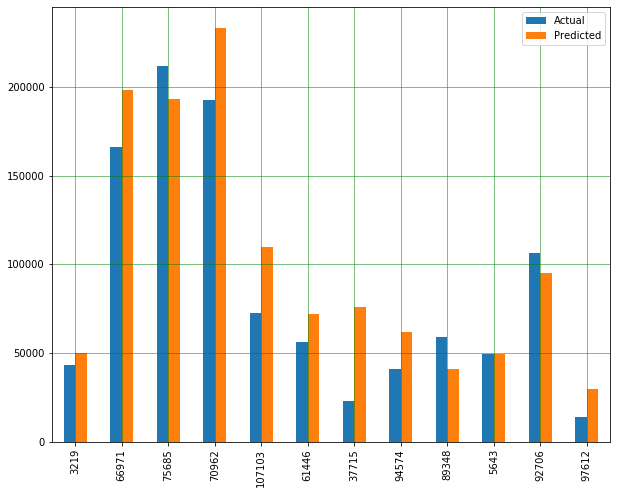

In [80]:

df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [81]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 22522.535651912855
Mean Squared Error: 717163779.204042
Root Mean Squared Error: 26779.913726598188


In [82]:
# import statsmodels.api as sm
# from scipy import stats
# XN = sm.add_constant(X)
# est = sm.OLS(y, XN)
# est2 = est.fit()
# print(est2.summary())

In [83]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor
# from statsmodels.tools.tools import add_constant
# pd.Series([variance_inflation_factor(X.values, i) 
#                for i in range(X.shape[1])], 
#               index=X.columns)


In [84]:
df2 = pd.read_csv('~/Desktop/machine learning/Kaggle Competition/tcd ml 2019-20 income prediction test (without labels).csv'
                     ,header=None, names=['ins','yor','gd','age','cou','soc'
                                         ,'pro','ud','wg','hc','bh','inc'])
df2=df2.drop(['ins'], axis=1)
df2=df2.drop([0])
cleanup_nums = {"gd":     {"0": np.nan},
                "cou": {"0": np.nan},
                "pro": {"0": np.nan},
                "ud": {"0": np.nan},
                "hc": {"0": np.nan}
               }
df2.replace(cleanup_nums, inplace=True)
df2.replace('No', np.nan, inplace=True)
df2.replace('Unknown', np.nan, inplace=True)
df2.replace('unknown', np.nan, inplace=True)
df2.replace('unknow', np.nan, inplace=True)
df2.head(10)

# numerical columns
num_cols = ['yor','age','bh','soc','wg']
# convert numerical data 
df2[num_cols] = df2[num_cols].apply(pd.to_numeric, errors='coerce')
# categorical columns
cate_cols = df2.columns.drop('inc').drop(num_cols)
# display categorical columns
cate_cols
# delete the space and convert to string
df2['ud'] = df2['ud'].str.strip()
df2['pro'] = df2['pro'].str.strip()
df2['cou'] = df2['cou'].str.strip()
df2['hc'] = df2['hc'].str.strip()
df2['gd'] = df2['gd'].str.strip()
# X and y
X2 = df2.drop(columns=['inc'])
df2['inc']=df2['inc'].apply(pd.to_numeric, errors='coerce')
y2= df2['inc']
# define numerical imputer
num_imputer = Imputer(strategy='median')
# imputing on numerical data
X2[num_cols] = num_imputer.fit_transform(X2[num_cols])
# define categorical imputer
cate_imputer = Categorical_Imputer('most_frequent')

# imputing on categorical data
X2[cate_cols_noud] = cate_imputer.fit_transform(X2[cate_cols_noud])
# X2['gd'].fillna('other', inplace=True)
# df2['gd']=X2['gd']
# X2['cou'].fillna('other', inplace=True)
# df2['cou']=X2['cou']
# X2['pro'].fillna('other', inplace=True)
# df2['pro']=X2['pro']
# X2['hc'].fillna('other', inplace=True)
# df2['hc']=X2['hc']

/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,1,3,5,8,10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [85]:
X2['ud'].fillna(0, inplace=True)
X2['ud'].unique()

array(['Master', 'Bachelor', 0, 'PhD'], dtype=object)

In [86]:
X_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111826 entries, 32055 to 78094
Data columns (total 10 columns):
yor    111826 non-null float64
gd     111826 non-null object
age    111826 non-null float64
cou    111826 non-null object
soc    111826 non-null float64
pro    111826 non-null object
ud     111826 non-null object
wg     111826 non-null float64
hc     111826 non-null object
bh     111826 non-null float64
dtypes: float64(5), object(5)
memory usage: 9.4+ MB


In [87]:
X_new.head(20)

,yor,gd,age,cou,soc,pro,ud,wg,hc,bh
32055,1997.0,female,20.0,Serbia,1961.0,parking enforcement officer,0,1.0,Blond,172.0
104951,1989.0,female,20.0,Israel,76251.0,parking lot attendant,Bachelor,0.0,Blond,165.0
39989,1983.0,female,18.0,Lebanon,43885.0,grant manager,0,1.0,Blond,143.0
48910,2019.0,female,19.0,Switzerland,31525.0,order filler,0,0.0,Black,160.0
14526,1999.0,male,17.0,Laos,66151.0,interagency exercise coordinator,Bachelor,1.0,Brown,179.0
31529,1987.0,female,21.0,Switzerland,22496.0,operations manager,Master,0.0,Blond,140.0
19585,1989.0,female,36.0,Tajikistan,79757.0,computer scientist,Bachelor,1.0,Black,151.0
58000,2007.0,female,24.0,Paraguay,5845.0,furniture coordinator,PhD,0.0,Black,149.0
53497,2013.0,female,16.0,Sierra Leone,79058.0,molder,0,0.0,Blond,165.0
50612,1998.0,female,15.0,Togo,32610.0,senior intergroup relations officer,Bachelor,0.0,Black,156.0


In [88]:
# X2['bh']=X2['bh']-X2['bh'].mean()
# X2['age']=X2['age']-X2['age'].mean()
# X2['yor']=X2['yor']-1979

In [89]:
y.head()

32055      6.113263
104951    29.730641
39989     35.926513
48910     65.548061
14526     67.667744
Name: inc, dtype: float64

In [90]:
X2['cou'].unique()

array(['Honduras', 'Kyrgyzstan', 'Portugal', 'Uruguay', 'Serbia',
       'United Arab Emirates', 'Slovakia', 'Togo', 'Liberia',
       'El Salvador', 'Bolivia', 'Switzerland', 'Congo', 'Malawi',
       'Czechia', 'Israel', 'Panama', 'Nicaragua', 'Belarus', 'Syria',
       'Finland', 'Sweden', 'Tajikistan', 'Lebanon', 'Sierra Leone',
       'South Sudan', 'Libya', 'Denmark', 'Tunisia', 'Mauritania',
       'Eritrea', 'Guinea', 'Oman', "Côte d'Ivoire", 'Kuwait', 'Georgia',
       'Azerbaijan', 'Laos', 'Norway', 'Paraguay', 'Jamaica',
       'Papua New Guinea', 'Belgium', 'Cuba', 'Ireland', 'Hungary',
       'Jordan', 'Rwanda', 'Singapore', 'Haiti', 'Guatemala',
       'Costa Rica', 'Turkmenistan', 'Burundi', 'Angola',
       'Bosnia and Herzegovina', 'Netherlands', 'Bulgaria', 'Gabon',
       'Greece', 'Ecuador', 'Burkina Faso', 'Lesotho', 'New Zealand',
       'State of Palestine', 'Mongolia', 'Central African Republic',
       'Zambia', 'Somalia', 'Austria', 'Dominican Republic', 'Qata

In [91]:
missing_values_table(X2)

Your slelected dataframe has 10 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [92]:
frames = [X_new, X2]
result = pd.concat(frames)

In [93]:
#result['pro']=result['cou']+result['pro']
result.head(20)

,yor,gd,age,cou,soc,pro,ud,wg,hc,bh
32055,1997.0,female,20.0,Serbia,1961.0,parking enforcement officer,0,1.0,Blond,172.0
104951,1989.0,female,20.0,Israel,76251.0,parking lot attendant,Bachelor,0.0,Blond,165.0
39989,1983.0,female,18.0,Lebanon,43885.0,grant manager,0,1.0,Blond,143.0
48910,2019.0,female,19.0,Switzerland,31525.0,order filler,0,0.0,Black,160.0
14526,1999.0,male,17.0,Laos,66151.0,interagency exercise coordinator,Bachelor,1.0,Brown,179.0
31529,1987.0,female,21.0,Switzerland,22496.0,operations manager,Master,0.0,Blond,140.0
19585,1989.0,female,36.0,Tajikistan,79757.0,computer scientist,Bachelor,1.0,Black,151.0
58000,2007.0,female,24.0,Paraguay,5845.0,furniture coordinator,PhD,0.0,Black,149.0
53497,2013.0,female,16.0,Sierra Leone,79058.0,molder,0,0.0,Blond,165.0
50612,1998.0,female,15.0,Togo,32610.0,senior intergroup relations officer,Bachelor,0.0,Black,156.0


In [94]:
# for index, row in result.iterrows():
#     #print(index, row['inc'])
#     a = row['pro']
#     if str(a) not in mymap:
#         mymap[row['pro']] = i
#         i=i+1
# mymap

In [95]:
# Encoding
import category_encoders as ce
# ordinal_cols_mapping = [{
#     "col":"ud",    
#     "mapping":{
#         0:0,
#         'Bachelor':0.6, 
#         'Master':0.8, 
#         'PhD':1
#     } 
#     }
# ]
# encoder = ce.OrdinalEncoder(mapping = ordinal_cols_mapping, 
#                          return_df = True) 

# encoder=ce.OrdinalEncoder(cols=['ud'])

#cat= pd.Categorical(X['ud'],ordered=True, categories=['missing', 'low', 'medium','high'])
#cat.fillna('missing')
# result=encoder.fit_transform(result)
#X=encoder.transform(X)
result['ud'].unique()

# encoder=ce.OrdinalEncoder(cols=['pro'])
# encoder.fit(result)
# result=encoder.transform(result)

#from sklearn.preprocessing import OneHotEncoder
encoder=ce.BinaryEncoder(cols=['cou','pro'])
encoder.fit(result)
result=encoder.transform(result)
encoder =ce.OneHotEncoder(cols=['gd','ud','hc'],handle_unknown='ignore')
encoder.fit(result)
result=encoder.transform(result)

In [96]:
# result['pro']=result['pro'].map(mymap)
result.head(20)

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_2,ud_3,ud_4,ud_5,wg,hc_1,hc_2,hc_3,hc_4,bh
32055,1997.0,1,0,0,20.0,0,0,0,0,0,...,0,0,0,0,1.0,1,0,0,0,172.0
104951,1989.0,1,0,0,20.0,0,0,0,0,0,...,1,0,0,0,0.0,1,0,0,0,165.0
39989,1983.0,1,0,0,18.0,0,0,0,0,0,...,0,0,0,0,1.0,1,0,0,0,143.0
48910,2019.0,1,0,0,19.0,0,0,0,0,0,...,0,0,0,0,0.0,0,1,0,0,160.0
14526,1999.0,0,1,0,17.0,0,0,0,0,0,...,1,0,0,0,1.0,0,0,1,0,179.0
31529,1987.0,1,0,0,21.0,0,0,0,0,0,...,0,1,0,0,0.0,1,0,0,0,140.0
19585,1989.0,1,0,0,36.0,0,0,0,0,0,...,1,0,0,0,1.0,0,1,0,0,151.0
58000,2007.0,1,0,0,24.0,0,0,0,0,0,...,0,0,1,0,0.0,0,1,0,0,149.0
53497,2013.0,1,0,0,16.0,0,0,0,0,0,...,0,0,0,0,0.0,1,0,0,0,165.0
50612,1998.0,1,0,0,15.0,0,0,0,0,0,...,1,0,0,0,0.0,0,1,0,0,156.0


In [97]:
result.describe()


,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_2,ud_3,ud_4,ud_5,wg,hc_1,hc_2,hc_3,hc_4,bh
count,185056.000000,185056.000000,185056.000000,185056.000000,185056.000000,185056.0,185056.000000,185056.000000,185056.000000,185056.000000,...,185056.000000,185056.000000,185056.000000,185056.000000,185056.000000,185056.000000,185056.000000,185056.000000,185056.000000,185056.000000
mean,1999.456732,0.242202,0.516427,0.241370,37.303913,0.0,0.001686,0.129723,0.345593,0.408557,...,0.383814,0.242127,0.060625,0.124400,0.500589,0.241035,0.455257,0.242510,0.061198,175.197924
std,11.549812,0.428417,0.499731,0.427915,15.964049,0.0,0.041026,0.335999,0.475562,0.491568,...,0.486315,0.428372,0.238642,0.330038,0.500001,0.427713,0.497995,0.428602,0.239693,19.898148
min,1980.000000,0.000000,0.000000,0.000000,14.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000
25%,1989.000000,0.000000,0.000000,0.000000,24.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,160.000000
50%,1999.000000,0.000000,1.000000,0.000000,35.000000,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,174.000000
75%,2009.000000,0.000000,1.000000,0.000000,48.000000,0.0,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,190.000000
max,2019.000000,1.000000,1.000000,1.000000,126.000000,0.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,265.000000


In [98]:
result

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_2,ud_3,ud_4,ud_5,wg,hc_1,hc_2,hc_3,hc_4,bh
32055,1997.0,1,0,0,20.0,0,0,0,0,0,...,0,0,0,0,1.0,1,0,0,0,172.0
104951,1989.0,1,0,0,20.0,0,0,0,0,0,...,1,0,0,0,0.0,1,0,0,0,165.0
39989,1983.0,1,0,0,18.0,0,0,0,0,0,...,0,0,0,0,1.0,1,0,0,0,143.0
48910,2019.0,1,0,0,19.0,0,0,0,0,0,...,0,0,0,0,0.0,0,1,0,0,160.0
14526,1999.0,0,1,0,17.0,0,0,0,0,0,...,1,0,0,0,1.0,0,0,1,0,179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73226,2012.0,0,1,0,37.0,0,0,0,1,0,...,1,0,0,0,0.0,0,0,1,0,203.0
73227,2016.0,0,0,1,42.0,0,0,0,1,0,...,0,0,0,1,0.0,0,1,0,0,181.0
73228,2019.0,0,0,1,50.0,0,0,0,0,1,...,0,1,0,0,1.0,0,0,1,0,162.0
73229,1980.0,1,0,0,54.0,0,0,0,1,1,...,0,1,0,0,1.0,0,0,1,0,162.0


In [99]:
num=X_new.shape[0]
resultN=result.shape[0]

In [100]:
X_train_new, y_train_new=result.iloc[:num,:],y

In [101]:
X_test_new=result.iloc[num:resultN,]

In [102]:
X_test_new.head()

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_2,ud_3,ud_4,ud_5,wg,hc_1,hc_2,hc_3,hc_4,bh
1,1992.0,0,0,1,21.0,0,0,0,0,1,...,0,1,0,0,1.0,0,0,1,0,153.0
2,1986.0,0,0,1,34.0,0,0,0,0,1,...,1,0,0,0,0.0,0,1,0,0,163.0
3,1994.0,0,1,0,53.0,0,0,0,0,0,...,1,0,0,0,1.0,1,0,0,0,153.0
4,1984.0,0,1,0,29.0,0,0,1,0,0,...,0,0,0,1,0.0,0,1,0,0,154.0
5,2007.0,0,0,1,17.0,0,0,0,0,0,...,0,0,0,1,0.0,0,0,0,1,191.0


In [103]:
from sklearn import preprocessing


scaler=preprocessing.StandardScaler()
std_scale=scaler.fit(X_train_new[special_cols])
X_train_new[special_cols]=std_scale.transform(X_train_new[special_cols])

std_scale=scaler.fit(X_test_new[special_cols])
X_test_new[special_cols]=std_scale.transform(X_test_new[special_cols])
X_test_new.head()

/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/Users/jiachuanwang/anaconda3/envs/MachineLearning/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataF

,yor,gd_1,gd_2,gd_3,age,cou_0,cou_1,cou_2,cou_3,cou_4,...,ud_2,ud_3,ud_4,ud_5,wg,hc_1,hc_2,hc_3,hc_4,bh
1,-0.651022,0,0,1,-1.019983,0,0,0,0,1,...,0,1,0,0,0.998526,0,0,1,0,-1.113016
2,-1.170705,0,0,1,-0.202804,0,0,0,0,1,...,1,0,0,0,-1.001476,0,1,0,0,-0.610090
3,-0.477795,0,1,0,0.991535,0,0,0,0,0,...,1,0,0,0,0.998526,1,0,0,0,-1.113016
4,-1.343932,0,1,0,-0.517104,0,0,1,0,0,...,0,0,0,1,-1.001476,0,1,0,0,-1.062723
5,0.648184,0,0,1,-1.271423,0,0,0,0,0,...,0,0,0,1,-1.001476,0,0,0,1,0.798103


In [104]:
y_test_new=y2
y_test_new.shape

(73230,)

In [105]:
# model_new =CatBoostRegressor()
fit_new = model.fit(X_train_new, y_train_new)

0:	learn: 146969.1351698	total: 21.3ms	remaining: 21.3s
1:	learn: 144219.0587330	total: 41.1ms	remaining: 20.5s
2:	learn: 141572.0378952	total: 61.2ms	remaining: 20.4s
3:	learn: 139031.1642122	total: 82.5ms	remaining: 20.6s
4:	learn: 136594.5728461	total: 97.9ms	remaining: 19.5s
5:	learn: 134239.3714135	total: 113ms	remaining: 18.7s
6:	learn: 131970.6814663	total: 128ms	remaining: 18.1s
7:	learn: 129794.5200791	total: 142ms	remaining: 17.7s
8:	learn: 127705.7521826	total: 158ms	remaining: 17.4s
9:	learn: 125710.0602577	total: 174ms	remaining: 17.2s
10:	learn: 123794.2338404	total: 189ms	remaining: 17s
11:	learn: 121970.0573451	total: 203ms	remaining: 16.7s
12:	learn: 120207.0251726	total: 217ms	remaining: 16.5s
13:	learn: 118520.6796729	total: 238ms	remaining: 16.7s
14:	learn: 116905.0804400	total: 254ms	remaining: 16.7s
15:	learn: 115359.8821562	total: 274ms	remaining: 16.9s
16:	learn: 113882.3703743	total: 290ms	remaining: 16.8s
17:	learn: 112470.9952344	total: 315ms	remaining: 17.2s

154:	learn: 74579.7664972	total: 2.58s	remaining: 14s
155:	learn: 74541.0711119	total: 2.59s	remaining: 14s
156:	learn: 74479.7281801	total: 2.61s	remaining: 14s
157:	learn: 74433.3881897	total: 2.63s	remaining: 14s
158:	learn: 74379.7850841	total: 2.65s	remaining: 14s
159:	learn: 74336.5349158	total: 2.66s	remaining: 14s
160:	learn: 74304.7800249	total: 2.67s	remaining: 13.9s
161:	learn: 74082.4070158	total: 2.69s	remaining: 13.9s
162:	learn: 74029.4890790	total: 2.7s	remaining: 13.9s
163:	learn: 73985.2709668	total: 2.72s	remaining: 13.8s
164:	learn: 73946.8163543	total: 2.73s	remaining: 13.8s
165:	learn: 73737.1765829	total: 2.75s	remaining: 13.8s
166:	learn: 73685.2081089	total: 2.76s	remaining: 13.8s
167:	learn: 73632.5013725	total: 2.77s	remaining: 13.7s
168:	learn: 73576.8345890	total: 2.79s	remaining: 13.7s
169:	learn: 73515.4622605	total: 2.81s	remaining: 13.7s
170:	learn: 73464.9351274	total: 2.83s	remaining: 13.7s
171:	learn: 73403.1466227	total: 2.84s	remaining: 13.7s
172:	

307:	learn: 69250.0508657	total: 4.85s	remaining: 10.9s
308:	learn: 69232.3305149	total: 4.87s	remaining: 10.9s
309:	learn: 69216.4657803	total: 4.89s	remaining: 10.9s
310:	learn: 69195.4252668	total: 4.9s	remaining: 10.9s
311:	learn: 69185.2286231	total: 4.92s	remaining: 10.8s
312:	learn: 69166.3444362	total: 4.93s	remaining: 10.8s
313:	learn: 69150.3006024	total: 4.94s	remaining: 10.8s
314:	learn: 69137.4631208	total: 4.96s	remaining: 10.8s
315:	learn: 69122.1259856	total: 4.97s	remaining: 10.8s
316:	learn: 69108.2903453	total: 4.98s	remaining: 10.7s
317:	learn: 69101.7743969	total: 5s	remaining: 10.7s
318:	learn: 69090.8139577	total: 5.01s	remaining: 10.7s
319:	learn: 69079.6267778	total: 5.02s	remaining: 10.7s
320:	learn: 69066.6249182	total: 5.04s	remaining: 10.7s
321:	learn: 69050.2813067	total: 5.05s	remaining: 10.6s
322:	learn: 69028.7443478	total: 5.07s	remaining: 10.6s
323:	learn: 69015.4613448	total: 5.09s	remaining: 10.6s
324:	learn: 69003.1802627	total: 5.1s	remaining: 10.

461:	learn: 67257.7634941	total: 7.14s	remaining: 8.32s
462:	learn: 67252.5045127	total: 7.16s	remaining: 8.31s
463:	learn: 67244.8253986	total: 7.18s	remaining: 8.3s
464:	learn: 67232.4104116	total: 7.2s	remaining: 8.28s
465:	learn: 67222.7411484	total: 7.21s	remaining: 8.26s
466:	learn: 67211.5406737	total: 7.23s	remaining: 8.25s
467:	learn: 67208.9728338	total: 7.24s	remaining: 8.23s
468:	learn: 67200.0533770	total: 7.25s	remaining: 8.21s
469:	learn: 67194.8920741	total: 7.27s	remaining: 8.2s
470:	learn: 67172.6915318	total: 7.28s	remaining: 8.18s
471:	learn: 67161.8283510	total: 7.3s	remaining: 8.16s
472:	learn: 67145.1838763	total: 7.31s	remaining: 8.15s
473:	learn: 67133.1051578	total: 7.33s	remaining: 8.13s
474:	learn: 67124.6067223	total: 7.34s	remaining: 8.11s
475:	learn: 67116.5080910	total: 7.36s	remaining: 8.1s
476:	learn: 67103.6087131	total: 7.37s	remaining: 8.08s
477:	learn: 67092.0482916	total: 7.39s	remaining: 8.07s
478:	learn: 67082.3076731	total: 7.41s	remaining: 8.0

614:	learn: 66001.6768724	total: 10.1s	remaining: 6.34s
615:	learn: 65991.0351151	total: 10.2s	remaining: 6.34s
616:	learn: 65985.2020857	total: 10.2s	remaining: 6.34s
617:	learn: 65974.1344513	total: 10.3s	remaining: 6.34s
618:	learn: 65968.8966920	total: 10.3s	remaining: 6.33s
619:	learn: 65959.7837634	total: 10.3s	remaining: 6.33s
620:	learn: 65954.6363952	total: 10.4s	remaining: 6.32s
621:	learn: 65946.0568174	total: 10.4s	remaining: 6.31s
622:	learn: 65938.6959837	total: 10.4s	remaining: 6.31s
623:	learn: 65935.2234562	total: 10.5s	remaining: 6.3s
624:	learn: 65932.1541678	total: 10.5s	remaining: 6.3s
625:	learn: 65928.1522834	total: 10.5s	remaining: 6.29s
626:	learn: 65916.2500506	total: 10.6s	remaining: 6.29s
627:	learn: 65910.9934110	total: 10.6s	remaining: 6.28s
628:	learn: 65908.6043048	total: 10.6s	remaining: 6.28s
629:	learn: 65905.0120468	total: 10.7s	remaining: 6.26s
630:	learn: 65897.9848650	total: 10.7s	remaining: 6.25s
631:	learn: 65896.1609655	total: 10.7s	remaining: 

772:	learn: 65088.8449379	total: 13.3s	remaining: 3.92s
773:	learn: 65086.6767674	total: 13.4s	remaining: 3.9s
774:	learn: 65082.0370797	total: 13.4s	remaining: 3.88s
775:	learn: 65076.7488122	total: 13.4s	remaining: 3.86s
776:	learn: 65072.2696243	total: 13.4s	remaining: 3.85s
777:	learn: 65065.8942002	total: 13.4s	remaining: 3.83s
778:	learn: 65058.1892881	total: 13.4s	remaining: 3.81s
779:	learn: 65056.3296557	total: 13.4s	remaining: 3.79s
780:	learn: 65051.4832778	total: 13.5s	remaining: 3.77s
781:	learn: 65044.2091546	total: 13.5s	remaining: 3.76s
782:	learn: 65036.5585456	total: 13.5s	remaining: 3.74s
783:	learn: 65031.9395053	total: 13.5s	remaining: 3.72s
784:	learn: 65005.1741145	total: 13.5s	remaining: 3.7s
785:	learn: 64999.9229268	total: 13.5s	remaining: 3.68s
786:	learn: 64996.0065754	total: 13.6s	remaining: 3.67s
787:	learn: 64993.7256624	total: 13.6s	remaining: 3.65s
788:	learn: 64989.4929445	total: 13.6s	remaining: 3.63s
789:	learn: 64985.8790133	total: 13.6s	remaining: 

923:	learn: 64265.3589849	total: 15.6s	remaining: 1.28s
924:	learn: 64264.0629623	total: 15.6s	remaining: 1.27s
925:	learn: 64256.5827394	total: 15.6s	remaining: 1.25s
926:	learn: 64253.2252422	total: 15.7s	remaining: 1.23s
927:	learn: 64250.5818622	total: 15.7s	remaining: 1.22s
928:	learn: 64246.9952229	total: 15.7s	remaining: 1.2s
929:	learn: 64245.5737055	total: 15.7s	remaining: 1.18s
930:	learn: 64242.9613388	total: 15.7s	remaining: 1.16s
931:	learn: 64240.7724598	total: 15.7s	remaining: 1.15s
932:	learn: 64234.5741897	total: 15.7s	remaining: 1.13s
933:	learn: 64231.7940114	total: 15.8s	remaining: 1.11s
934:	learn: 64229.2040788	total: 15.8s	remaining: 1.1s
935:	learn: 64225.9049145	total: 15.8s	remaining: 1.08s
936:	learn: 64223.2428614	total: 15.8s	remaining: 1.06s
937:	learn: 64220.3734679	total: 15.8s	remaining: 1.04s
938:	learn: 64217.6118785	total: 15.8s	remaining: 1.03s
939:	learn: 64208.3805142	total: 15.9s	remaining: 1.01s
940:	learn: 64204.6492685	total: 15.9s	remaining: 

In [106]:
y_pred_new = model.predict(X_test_new)

In [107]:
dfff = pd.read_csv('~/Desktop/machine learning/Kaggle Competition/Example/tcd ml 2019-20 income prediction submission file.csv')

In [108]:
dfff['Income']=y_pred_new

In [109]:
dfff.head()

,Instance,Income
0,111994,27710.936365
1,111995,21501.742795
2,111996,35999.592481
3,111997,127363.397174
4,111998,6837.201971


In [110]:
dfff.to_csv('tcd ml 2019-20 income prediction submission file.csv',mode = 'w', index=False)